In [1]:
import numpy as np 
import pandas as pd 
import os

In [2]:
# Rutas de los archivos de Excel
file_path = 'DataRevisar.xlsx' # Actualiza con la ruta de tu segundo archivo

# Cargar los datos de ambos archivos
data = pd.read_excel(file_path)

# Ver el DataFrame combinado
data

,sentence,cefr
0,"Hola, mi nombre es Leon. No hablo inglés, pero...",A1
1,Hola... De: Para: Fecha: ¡Hola! ¿Cómo estás? M...,A1
2,Querida Anna: Estoy auding. Tengo 33 años. Enc...,A1
3,"¡Hola! Encantado de conocerte. Estoy bien, gra...",A1
4,¡Hola profesor! ¿Cómo está? Mi nombre es Marco...,A1
...,...,...
2094,Mi nombre es Erika y soy ingeniera. Trabajo en...,A2
2095,Soy gerente de planta en mi empresa. Todos los...,A2
2096,"Trabajo en Weihai, en una empresa que produce ...",A2
2097,"Soy doctor, pero también soy profesor. Me gust...",A2


In [3]:
# Mantener solo las columnas 'cefr' y 'sentence'
filtered_data = data[['cefr', 'sentence']]

# Crear la columna 'id' incremental
filtered_data['id'] = range(1, len(filtered_data) + 1)

# Renombrar las columnas
filtered_data.rename(columns={'cefr': 'difficulty'}, inplace=True)

# Ver el DataFrame final
print(filtered_data)

# Ver el DataFrame final
filtered_data.to_excel('training_data.xlsx', index=False)

     difficulty                                           sentence    id
0            A1  Hola, mi nombre es Leon. No hablo inglés, pero...     1
1            A1  Hola... De: Para: Fecha: ¡Hola! ¿Cómo estás? M...     2
2            A1  Querida Anna: Estoy auding. Tengo 33 años. Enc...     3
3            A1  ¡Hola! Encantado de conocerte. Estoy bien, gra...     4
4            A1  ¡Hola profesor! ¿Cómo está? Mi nombre es Marco...     5
...         ...                                                ...   ...
2094         A2  Mi nombre es Erika y soy ingeniera. Trabajo en...  2095
2095         A2  Soy gerente de planta en mi empresa. Todos los...  2096
2096         A2  Trabajo en Weihai, en una empresa que produce ...  2097
2097         A2  Soy doctor, pero también soy profesor. Me gust...  2098
2098         A2  Soy oficinista en la empresa Julian China Limi...  2099

[2099 rows x 3 columns]


C:\Users\Steep\AppData\Local\Temp\ipykernel_15268\2067238590.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['id'] = range(1, len(filtered_data) + 1)
C:\Users\Steep\AppData\Local\Temp\ipykernel_15268\2067238590.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.rename(columns={'cefr': 'difficulty'}, inplace=True)


In [4]:
difficulty_counts = filtered_data['difficulty'].value_counts()
difficulty_counts

difficulty
A1    1999
A2     100
Name: count, dtype: int64

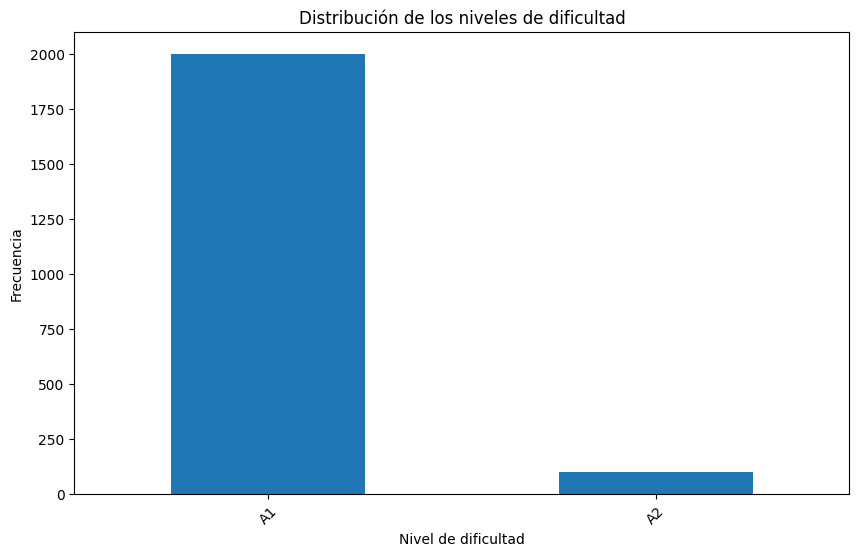

In [5]:
import matplotlib.pyplot as plt

# Dibujo de la distribución de los niveles de dificultad
plt.figure(figsize=(10, 6))
difficulty_counts.plot(kind='bar')
plt.title('Distribución de los niveles de dificultad')
plt.xlabel('Nivel de dificultad')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()


In [6]:
# Calcula la longitud de cada frase
filtered_data['sentence_length'] = filtered_data['sentence'].apply(len)

C:\Users\Steep\AppData\Local\Temp\ipykernel_15268\1032814730.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['sentence_length'] = filtered_data['sentence'].apply(len)


In [7]:
average_lengths = filtered_data.groupby('difficulty')['sentence_length'].mean()


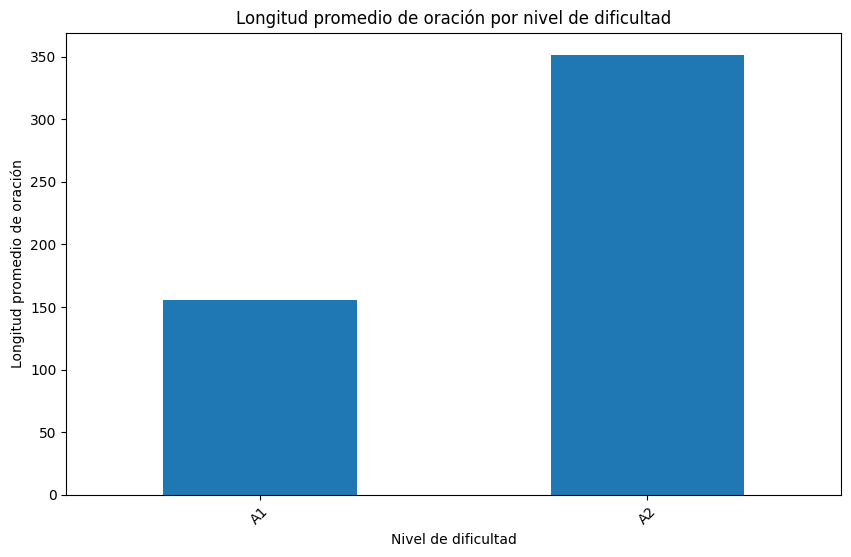

In [8]:
import matplotlib.pyplot as plt

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
average_lengths.plot(kind='bar')
plt.title('Longitud promedio de oración por nivel de dificultad')
plt.xlabel('Nivel de dificultad')
plt.ylabel('Longitud promedio de oración')
plt.xticks(rotation=45)
plt.show()


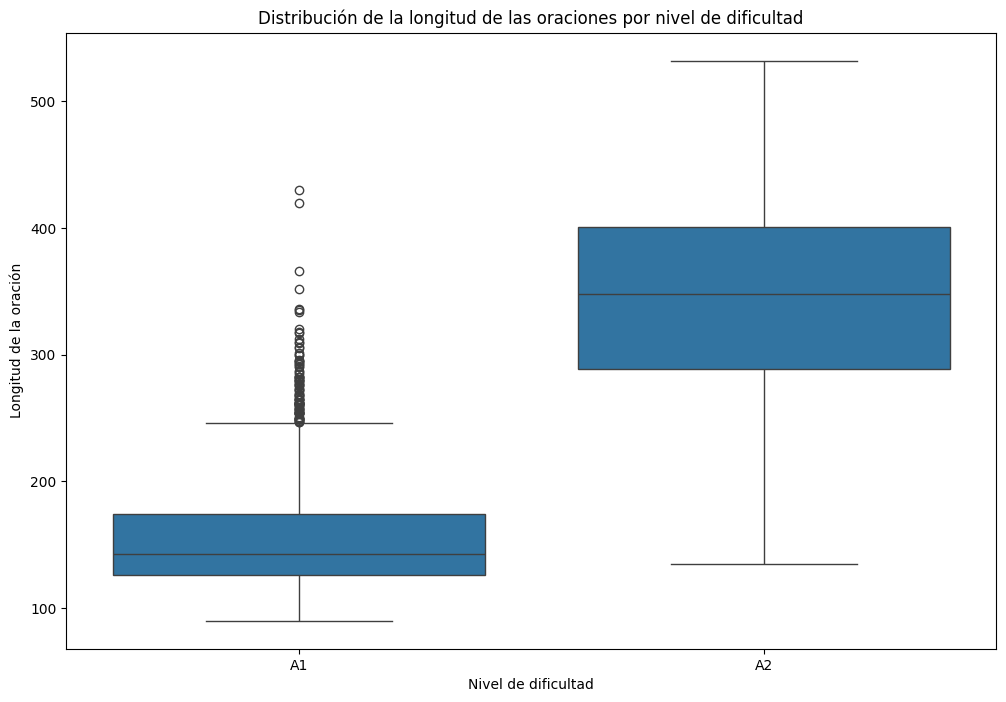

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crea un diagrama de caja
plt.figure(figsize=(12, 8))
sns.boxplot(x='difficulty', y='sentence_length', data=filtered_data)
plt.title('Distribución de la longitud de las oraciones por nivel de dificultad')
plt.xlabel('Nivel de dificultad')
plt.ylabel('Longitud de la oración')
plt.show()


In [10]:
# Identificar duplicados
duplicates = filtered_data[filtered_data.duplicated(subset='sentence', keep=False)]

# Contar duplicados
num_duplicates = duplicates.shape[0]

print(f"Numero de frases duplicadas : {num_duplicates}")


Numero de frases duplicadas : 6


In [11]:
Q1 = filtered_data['sentence_length'].quantile(0.25)
Q3 = filtered_data['sentence_length'].quantile(0.75)
IQR = Q3 - Q1

# Establecer umbrales para valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar valores atípicos
outliers = filtered_data[(filtered_data['sentence_length'] < lower_bound) | (filtered_data['sentence_length'] > upper_bound)]

print(f"Número de valores atípicos detectados : {outliers.shape[0]}")


Número de valores atípicos detectados : 147


In [12]:
# Mostrar valores atípicos, si desea revisarlos
if outliers.shape[0] > 0:
    print("Aquí están los valores atípicos detectados :")
    print(outliers)
else:
    print("No se detectaron valores atípicos.")


Aquí están los valores atípicos detectados :
     difficulty                                           sentence    id  \
50           A1  ¡Hola, Anna! Mi nombre es Alberto. Estoy bien,...    51   
77           A1  ¡Hola! Me alegra mucho saber de ti. Estoy feli...    78   
86           A1  ¡Hola! Mi nombre es Edin, trabajo en una escue...    87   
163          A1  ¡Hola, Anny! Encantada de conocerte. Mi nombre...   164   
186          A1  ¡Hola! Anna: He recibido tu carta. Estoy muy f...   187   
...         ...                                                ...   ...   
2094         A2  Mi nombre es Erika y soy ingeniera. Trabajo en...  2095   
2095         A2  Soy gerente de planta en mi empresa. Todos los...  2096   
2096         A2  Trabajo en Weihai, en una empresa que produce ...  2097   
2097         A2  Soy doctor, pero también soy profesor. Me gust...  2098   
2098         A2  Soy oficinista en la empresa Julian China Limi...  2099   

      sentence_length  
50                